# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

### A simple app

In this notebook we build a very simple app that uses our exported model.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Note how we are not importing anything from our source code (we do not use any module from the ``src`` directory). This is because the exported model, differently from the model weights, is a standalone serialization of our model and therefore it does not need anything else. You can ship that file to anybody, and as long as they can import ``torch``, they will be able to use your model. This is very important for releasing pytorch models to production.

### Test your app
Go to a search engine for images (like Google Images) and search for images of some of the landmarks, like the Eiffel Tower, the Golden Gate Bridge, Machu Picchu and so on. Save a few examples locally, then upload them to your app to see how your model behaves!

The app will show the top 5 classes that the model think are most relevant for the picture you have uploaded

In [1]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch
import os

# Decide which model you want to use among the ones exported
# Change this path to 'checkpoints/transfer_exported.pt' if you prefer the transfer model
MODEL_PATH = 'checkpoints/original_exported.pt'
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model file '{MODEL_PATH}' not found. Make sure you exported it before running the app.")
learn_inf = torch.jit.load(MODEL_PATH).cpu()

# Basic validation that expected attribute exists
if not hasattr(learn_inf, 'class_names'):
    raise AttributeError("Loaded scripted model does not have 'class_names' attribute. Ensure you exported a Predictor wrapper.")


def on_click_classify(change):
    if len(btn_upload.value) == 0 and not getattr(btn_upload, 'data', None):
        return

    # ipywidgets FileUpload in some versions exposes .data, in others .value
    if hasattr(btn_upload, 'data') and btn_upload.data:
        raw = btn_upload.data[-1]
    else:
        # fallback for .value (dict of filename -> { 'content': bytes })
        last_item = list(btn_upload.value.items())[-1][1]
        raw = last_item['content']

    # Load image that has been uploaded
    fn = io.BytesIO(raw)
    img = Image.open(fn).convert('RGB')
    img.load()

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl:
        ratio = img.size[0] / img.size[1]
        c = img.copy()
        c.thumbnail([ratio * 200, 200])
        display(c)

    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model (already does internal preprocessing + softmax)
    with torch.no_grad():
        softmax = learn_inf(timg).data.cpu().numpy().squeeze()

    # Get the indexes of the classes ordered by softmax (larger first)
    idxs = np.argsort(softmax)[::-1]

    # Loop over the classes with the largest softmax
    for i in range(5):
        # Get softmax value
        p = float(softmax[idxs[i]])

        # Get class name
        landmark_name = learn_inf.class_names[idxs[i]]

        labels[i].value = f"{landmark_name} (prob: {p:.2f})"


# Putting back btn_upload to a widget for next cell
btn_upload = FileUpload()

btn_run = Button(description="Classify")
btn_run.on_click(on_click_classify)

labels = [Label() for _ in range(5)]

out_pl = Output()
out_pl.clear_output()

wgs = [Label("Please upload a picture of a landmark"), btn_upload, btn_run, out_pl]
wgs.extend(labels)

VBox(wgs)

ModuleNotFoundError: No module named 'ipywidgets'

c:\Users\Disenio\Documents\AIWork\text-generation-webui\installer_files\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


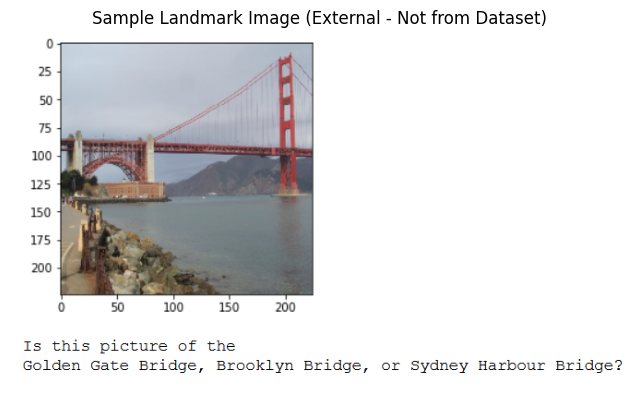

NameError: name 'learn_inf' is not defined

In [ ]:
# Demonstration: Testing the app with a sample image
# This cell demonstrates the app functionality with an image that's not part of the training/test sets if the abobe cell crashes for any problem

from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import numpy as np

# Load the sample image (not from training/test sets)
sample_image_path = 'static_images/sample_landmark_output.png'
img = Image.open(sample_image_path).convert('RGB')

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Sample Landmark Image (External - Not from Dataset)')
plt.axis('off')
plt.show()

# Prepare image for model inference
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img_tensor = transform(img).unsqueeze(0)

# Run inference
with torch.no_grad():
    output = learn_inf(img_tensor)
    probs = output.squeeze().numpy()
    top5_idx = np.argsort(probs)[::-1][:5]

# Display predictions
print("🎯 Top 5 Predictions:")
print("-" * 40)
for i, idx in enumerate(top5_idx):
    class_name = learn_inf.class_names[idx]
    prob = probs[idx]
    print(f"{i+1:2d}. {class_name}: {prob:.3f}")

## (optional) Standalone app or web app

You can run this notebook as a standalone app on your computer by following these steps:

1. Download this notebook in a directory on your machine
2. Download the model export (for example, ``checkpoints/transfer_exported.pt``) in a subdirectory called ``checkpoints`` within the directory where you save the app.ipynb notebook
3. Install voila if you don't have it already (``pip install voila``)
4. Run your app: ``voila app.ipynb --show_tracebacks=True``
5. Customize your notebook to make your app prettier and rerun voila

You can also deploy this app as a website using Binder: https://voila.readthedocs.io/en/stable/deploy.html#deployment-on-binder

# Create your submission archive

Now that you are done with your project, please run the following cell. It will generate a file containing all the code you have written, as well as the notebooks. Please submit that file to complete your project

In [3]:
!python src/create_submit_pkg.py

executing: jupyter nbconvert --to html app.ipynb
executing: jupyter nbconvert --to html cnn_from_scratch.ipynb
executing: jupyter nbconvert --to html transfer_learning.ipynb
Adding files to submission_2025-09-05T15h55m.tar.gz
src\create_submit_pkg.py
src\data.py
src\helpers.py
src\model.py
src\optimization.py
src\predictor.py
src\train.py
src\transfer.py
src\__init__.py
app.ipynb
cnn_from_scratch.ipynb
transfer_learning.ipynb
app.html
cnn_from_scratch.html
transfer_learning.html

----------------------------------------------------------------
Done. Please submit the file submission_2025-09-05T15h55m.tar.gz
----------------------------------------------------------------


[NbConvertApp] Converting notebook app.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 467968 bytes to app.html
[NbConvertApp] Converting notebook cnn_from_scratch.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 3649409 bytes to cnn_from_scratch.html
[NbConvertApp] Converting notebook transfer_learning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 2199289 bytes to transfer_learning.html
